### Statistics Analysis 
The following notebook analyses distibutions of the `p-values`, `t-statistics`, `h-statistics` collected from the articles.

- The biggest problem with gathering data for this part is that there is no uniform pattern in reporting the results. Therefore, data was collected manually.
 
 - Many papers report standard errors instead of `p/t-values` and marks significance with `*`. For the papers where number of observations was given.
     - Therefore, if data allowed standard errors were converted into the p/t-values
 
- Out of 12 **central bank papers** only 11, reported either `p/t-values` or `standard errors` that allowed for conversion.


In [1]:
import pandas as pd
import numpy as np
from read_json import JsonHelpers
import json
import os
import sys

# Load json helpers 
jfun = JsonHelpers()

# Get location of the csv files
tstats = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/tstatistics.csv')
pvalues = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/pvalues.csv')

# Stack columns and create column with paper labels
pvalues = pd.DataFrame(pvalues.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
pvalues.columns = ['article', 'pvalue']

# Cleaning pvalues
pvalues['pvalue'] = pvalues['pvalue'].astype(float)
pvalues = pvalues[(pvalues['pvalue'] >=0) & (pvalues['pvalue'] <=1)]


# Stack columns and create column with paper labels
tstats = pd.DataFrame(tstats.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
tstats.columns = ['article', 'tstat']

# Cleaning tstat
tstats['tstat'] = tstats['tstat'].astype(float)
tstats = tstats[(tstats['tstat'] > -30) & (tstats['tstat'] < 30)]

# Get central bank papers' labels
cb_label = jfun.central_bank_paper_label()

In [2]:
# Split t-stats: central bank paper vs remainder
tstats_cb = tstats[tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)
tstats_ncb = tstats[~tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)

# Split p-values: central bank paper vs remainder
pvalues_cb = pvalues[pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)
pvalues_ncb = pvalues[~pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)


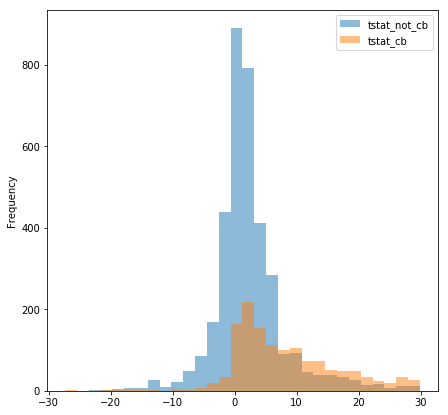

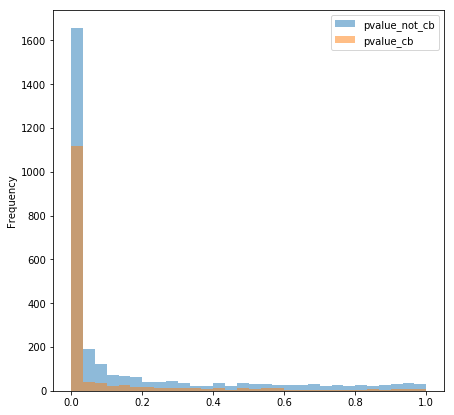

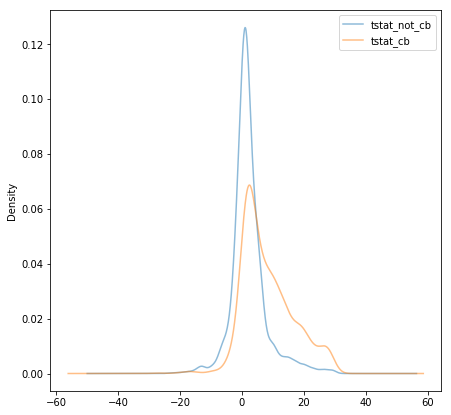

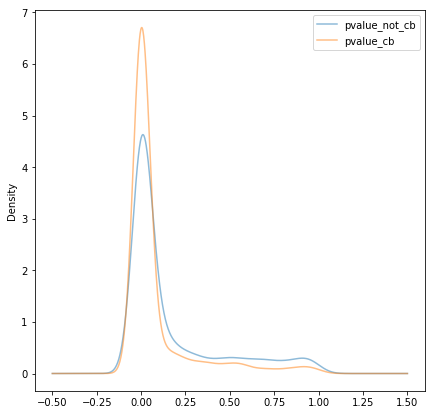

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

tstat_df = pd.concat([tstats_ncb['tstat'], tstats_cb['tstat']], axis=1)
tstat_df.columns = ['tstat_not_cb', 'tstat_cb']

pvalue_df = pd.concat([pvalues_ncb['pvalue'], pvalues_cb['pvalue']], axis=1)
pvalue_df.columns = ['pvalue_not_cb', 'pvalue_cb']

# Histograms
tstat_df.plot.hist(alpha=0.5, bins = 30, figsize=(7,7))
pvalue_df.plot.hist(alpha=0.5, bins = 30, figsize=(7,7))

# Density plots
tstat_df.plot.density(alpha=0.5, figsize=(7,7))
pvalue_df.plot.density(alpha=0.5, figsize=(7,7))

In [75]:
from scipy.stats import ks_2samp
ks_2samp(np.array(tstat_df['tstat_not_cb']), np.array(tstat_df['tstat_cb']))


Ks_2sampResult(statistic=0.6867934932451062, pvalue=0.0)

In [5]:
pvalue_df['pvalue_not_cb'].describe()

count    2.879000e+03
mean     1.627671e-01
std      2.712118e-01
min      0.000000e+00
25%      1.097696e-44
50%      1.100000e-02
75%      1.923094e-01
max      1.000000e+00
Name: pvalue_not_cb, dtype: float64

In [6]:
pvalue_df['pvalue_cb'].describe()

count    1.456000e+03
mean     8.362383e-02
std      2.008581e-01
min      0.000000e+00
25%      4.426629e-60
50%      1.936168e-11
75%      2.673376e-02
max      1.000000e+00
Name: pvalue_cb, dtype: float64

In [54]:
#hstat = pd.read_excel('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/statistics.xlsx', sheet_name='hstats')
#hstat.to_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/hstatistics.csv', index=False)


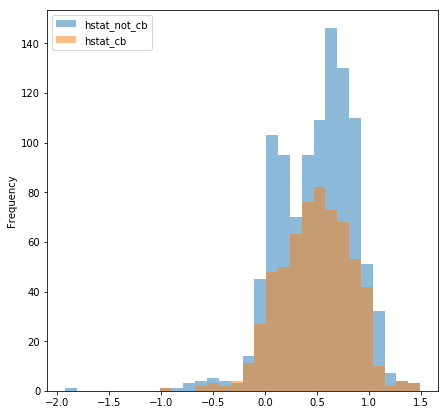

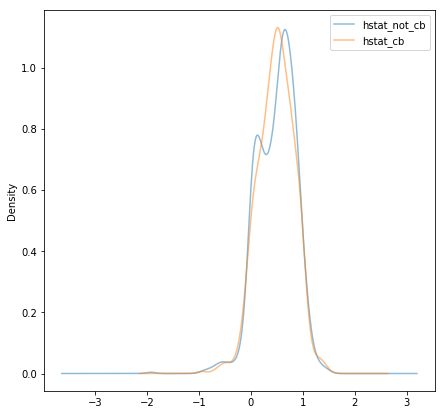

In [162]:
hstat = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/hstatistics.csv')
hstat = pd.DataFrame(hstat.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
hstat.columns = ['article', 'hstatistic']

hstat['hstatistic'] = hstat['hstatistic'].astype(float)
hstat = hstat[(hstat['hstatistic'] >= -2) & (hstat['hstatistic'] <= 1.5)]
hstat_cb = hstat[hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)
hstat_ncb = hstat[~hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)

# Excluding p001 paper by Bikker
hstat = hstat[hstat['article'] != 'p001']

hstat_cb = hstat[hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)
hstat_ncb = hstat[~hstat['article'].isin(cb_label)].dropna().reset_index(drop=True)

hstat_df = pd.concat([hstat_ncb['hstatistic'], hstat_cb['hstatistic']], axis=1)
hstat_df.columns = ['hstat_not_cb', 'hstat_cb']


hstat_df.plot.hist(alpha=0.5, bins = 30, figsize=(7,7))

# Density plots
hstat_df.plot.density(alpha=0.5, figsize=(7,7))

In [163]:
hstat_df['hstat_cb'].describe()

count    624.000000
mean       0.487966
std        0.343552
min       -0.940000
25%        0.260000
50%        0.510000
75%        0.740000
max        1.442600
Name: hstat_cb, dtype: float64

In [164]:
hstat_df['hstat_not_cb'].describe()

count    1036.000000
mean        0.492415
std         0.365573
min        -1.927600
25%         0.215000
50%         0.542500
75%         0.760000
max         1.490000
Name: hstat_not_cb, dtype: float64

In [166]:
ks_2samp(np.array(hstat_df['hstat_not_cb']), np.array(hstat_df['hstat_cb']))

Ks_2sampResult(statistic=0.3986486486486486, pvalue=1.0267063630101906e-72)

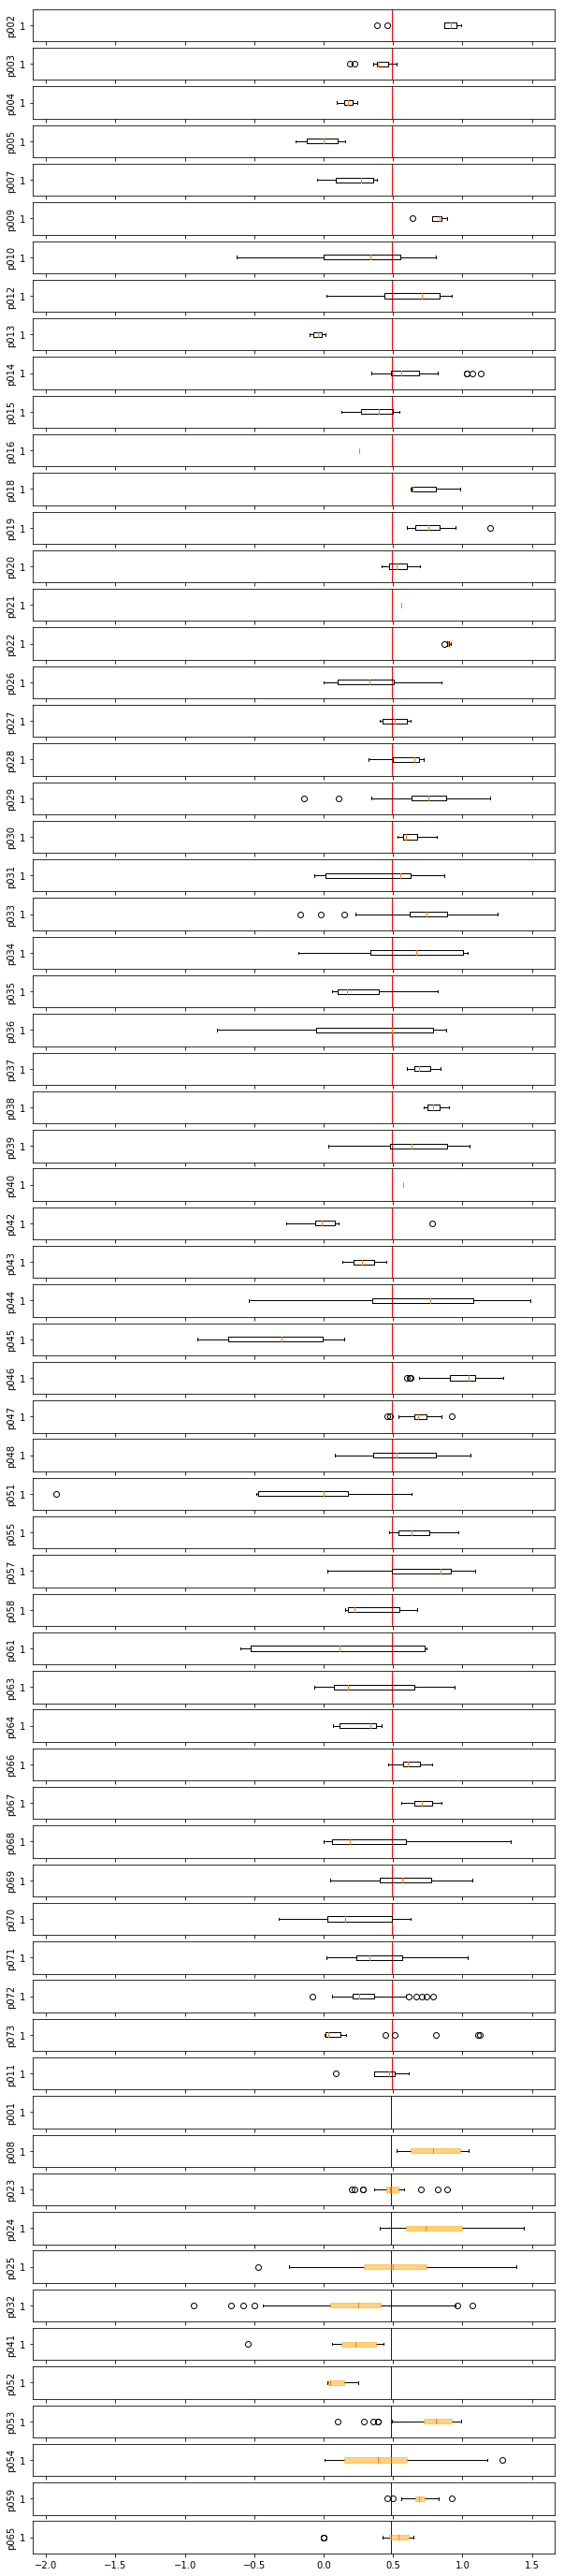

In [165]:
# Not cb labels
ncb_pap = hstat_ncb['article'].unique().tolist()

# Creating list of not central bank and central bank lables for plotting purposes
notcb_cb_labels = ncb_pap + cb_label

# Creating "meta plot"
fig, ax = plt.subplots(len(ncb_cb), 1, sharex='col', sharey='row', figsize = (10,50))


for i, article in enumerate(ncb_cb):
    if article in cb_label:
        ax[i].set_ylabel(article)
        ax[i].axvline(linewidth=1, color='b', x=0.487966)
        ax[i].boxplot(hstat.loc[hstat['article'] == article, 'hstatistic'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='orange', color='orange', alpha = 0.5))
    else:
        ax[i].set_ylabel(article)
        ax[i].axvline(linewidth=1, color='r', x=0.492415)
        ax[i].boxplot(hstat.loc[hstat['article'] == article, 'hstatistic'], vert=False)
        